In [99]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [100]:
'''
Calculates and compares various model performance metrics
'''

'\nCalculates and compares various model performance metrics\n'

In [101]:
# load data

# cluster assignments from method + L1 logistic regression

# pca
pca = pd.read_csv('../data/clusters_pca.csv')

# scFoundation
scgpt = pd.read_csv('../data/clusters_scgpt.csv')
scgpt['y_pred'] = scgpt['y_pred'].replace({'N':0, 'R':1})
scgpt['y_test'] = scgpt['y_test'].replace({'N':0, 'R':1})


# AI embeddings
embed = pd.read_csv('../data/clusters_embedding.csv')


In [102]:
# calculate scores

def score_method(m):
    accuracy = metrics.accuracy_score(m['y_pred'], m['y_test'])
    f1 = metrics.f1_score(m['y_pred'], m['y_test'])
    recall = metrics.recall_score(m['y_pred'], m['y_test'])
    precision = metrics.precision_score(m['y_pred'], m['y_test'])

    accuracies.append(accuracy)
    f1s.append(f1)
    recalls.append(recall)
    precisions.append(precision)

    return(accuracies, f1s, recalls, precisions)

In [103]:
# initiate variables

methods = [pca, scf, embed]
accuracies = []
f1s = []
recalls = []
precisions = []

for m in methods:
    score_method(m)

res = pd.DataFrame({'Method' : ['PCA', 'scGPT', 'AI embedding'],
                    'Accuracy': accuracies,
                    'F1': f1s,
                    'Recall': recalls,
                    'Precision': precisions})
res

,Method,Accuracy,F1,Recall,Precision
0,PCA,0.742857,0.800000,0.666667,1.000000
1,scGPT,0.771429,0.777778,0.700000,0.875000
2,AI embedding,0.485714,0.500000,0.529412,0.473684


Metric        Accuracy        F1  Precision    Recall
Method                                               
AI embedding  0.485714  0.500000   0.473684  0.529412
PCA           0.742857  0.800000   1.000000  0.666667
scGPT         0.771429  0.777778   0.875000  0.700000


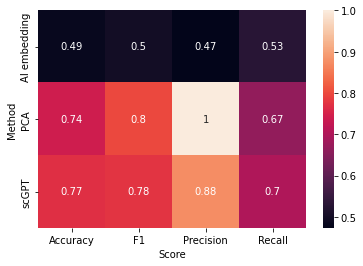

In [104]:
# plotting results

# format plot data
    
pl_data = pd.melt(res, id_vars = 'Method', value_vars = ['Accuracy', 'F1', 'Recall', 'Precision'], var_name = 'Metric', value_name = 'Score').pivot(index="Method", columns="Metric", values="Score")
print(pl_data)

ax = sns.heatmap(pl_data, annot = True)
ax.set(xlabel = 'Score', ylabel = 'Method')
ax.set_yticklabels(ax.get_yticklabels(), va="center")

# export plot

plt.savefig('../figures/scores.png')
